# Analysis of 2005 Taiwan Credit Card Dataset:
## Default Payments

Who is likely to default? What features are most important for predicting who will default?

From : https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

In [2]:
#importing dataset and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpl

In [3]:
import io

df = pd.read_csv(r"C:\Users\eklas\OneDrive\Desktop\CSV\Credit_Default.csv", skiprows = 1)
pd.options.display.max_rows = 10 #10 max rows so going forward it's not so messy to look at

df.head() #showing first 5 rows here

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# ID adds nothing, drop it like it's hot
df.drop(['ID'], inplace = True, axis = 1)

In [5]:
# all-caps screaming at me. Too much screaming in the world right now. Let's not be animals.
# Map the capitalizing function to all column names
df.columns = map(str.capitalize, df.columns)

In [6]:
#show the columns now
df.columns.tolist()

['Limit_bal',
 'Sex',
 'Education',
 'Marriage',
 'Age',
 'Pay_0',
 'Pay_2',
 'Pay_3',
 'Pay_4',
 'Pay_5',
 'Pay_6',
 'Bill_amt1',
 'Bill_amt2',
 'Bill_amt3',
 'Bill_amt4',
 'Bill_amt5',
 'Bill_amt6',
 'Pay_amt1',
 'Pay_amt2',
 'Pay_amt3',
 'Pay_amt4',
 'Pay_amt5',
 'Pay_amt6',
 'Default payment next month']

In [8]:
# Sex is antiquated, change that (to Gender) and Limit Bal (to Limit), 'Default payment next month' to 'Default'
df=df.rename(columns={'Sex':'Gender', 'Limit_bal':'Limit', 'Default payment next month':'Default'})

In [8]:
df.head()

,Limit,Gender,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
# how about the shape now shape of dataset
df.shape

(30000, 24)

In [10]:
#let's check for null values.
df.isnull().sum()/df.shape[0]
#yippee, squeaky clean dataset, no nulls.

Limit        0.0
Gender       0.0
Education    0.0
Marriage     0.0
Age          0.0
            ... 
Pay_amt3     0.0
Pay_amt4     0.0
Pay_amt5     0.0
Pay_amt6     0.0
Default      0.0
Length: 24, dtype: float64

In [11]:
# Get some more info about the dataset. Knowledge is power !
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Limit      30000 non-null  int64
 1   Gender     30000 non-null  int64
 2   Education  30000 non-null  int64
 3   Marriage   30000 non-null  int64
 4   Age        30000 non-null  int64
 5   Pay_0      30000 non-null  int64
 6   Pay_2      30000 non-null  int64
 7   Pay_3      30000 non-null  int64
 8   Pay_4      30000 non-null  int64
 9   Pay_5      30000 non-null  int64
 10  Pay_6      30000 non-null  int64
 11  Bill_amt1  30000 non-null  int64
 12  Bill_amt2  30000 non-null  int64
 13  Bill_amt3  30000 non-null  int64
 14  Bill_amt4  30000 non-null  int64
 15  Bill_amt5  30000 non-null  int64
 16  Bill_amt6  30000 non-null  int64
 17  Pay_amt1   30000 non-null  int64
 18  Pay_amt2   30000 non-null  int64
 19  Pay_amt3   30000 non-null  int64
 20  Pay_amt4   30000 non-null  int64
 21  Pay_amt5   3

In [9]:
# pretty print statement for nulls.

nulls = df.isnull().sum()
nulls = nulls.sum()
# no nulls, 31 cols, great
print('\nThere are', df.shape[0],'rows in the dataset')
print('There are', df.shape[1],'columns (features) in the dataset')
print('There are {}'.format(nulls),'nulls in the dataset')

if nulls < 1:
    print("Booya")
else:
    print("Imma isolate you null like you're coughing")


There are 30000 rows in the dataset
There are 24 columns (features) in the dataset
There are 0 nulls in the dataset
Booya


In [13]:
# Percentage of default and no default participants
dataset = df
count_no_default = len(dataset[dataset['Default']==0])
count_default = len(dataset[dataset['Default']==1])
pct_no_default = count_no_default/(count_no_default+count_default)*100
pct_of_default = count_default/(count_no_default+count_default)*100
print("Composition of the Dataset's Classes: \n")
print("Default: {:.1f}".format(pct_of_default), '%')
print("No Default: {:.1f}".format(pct_no_default), '%')

Composition of the Dataset's Classes: 

Default: 22.1 %
No Default: 77.9 %


In [14]:
#let's get the unique gender
df['Gender'].unique()

array([2, 1], dtype=int64)

In [15]:
df['Education'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [10]:
# Education: 5, 6, 0 denote 'Other'. That's too many; I want to replace those with 4 for a catchall 'Other' category

df['Education']=np.where(df['Education']==5, 4, df['Education'])
df['Education']=np.where(df['Education']==6, 4, df['Education'])
df['Education']=np.where(df['Education']==0, 4, df['Education'])

In [17]:
# lot of unique marriage situations going on, no judgement, do you

df['Marriage'].unique()

array([1, 2, 3, 0], dtype=int64)

In [11]:
# 0 and 3 represent Other, so should replace 0's with 3's 
# so that all the Others are in one giant beautiful Other soup

df['Marriage']=np.where(df['Marriage']==0, 3, df['Marriage'])

In [21]:
df['Default'].unique() # that's whats up

array([1, 0], dtype=int64)

In [ ]:
# Let's separate out people who used no credit and/or paid on time vs people who delayed a month or more, then count those.

# Payment status measurement: -2 = no CC use; -1 = paid in full, 0 = Use of revolving credit, 
# 1 = payment delay for one month, 2 = payment delay for two months; . . .; 8 = payment delay for eight months, 9 = payment delay for nine months and above.

In [12]:
# Now, to separate pmt status into unused or paid fully (0), and use of credit/pmt delays (1), then count the number of pay delays.

def paydelay(value):
    if value > 0:
        return 1
    else:
        return 0

In [13]:
# Implementing my paydelay function on the cols Pay_0 to Pay_6, 
# then creating a new column to show how many late pmts a client has made on aggregate

late_pmt = df.loc[:, 'Pay_0':'Pay_6'].applymap(paydelay).sum(axis = 1) # map my function to cols
df.insert(23, 'Late_Pmt', late_pmt) # Insert just before the Default col

In [24]:
# Let's see that shiny new col up agains binary Default

df[['Late_Pmt', 'Default']]

,Late_Pmt,Default
0,2,1
1,2,1
2,0,0
3,0,0
4,0,0
...,...,...
29995,0,0
29996,0,0
29997,3,1
29998,1,1


In [25]:
# Descriptive Analysis
pd.options.display.max_columns = 24 # letting loose, seeing all cols baybeeee
df.describe()

,Limit,Gender,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_amt1,...,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Late_Pmt,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.834200,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,1.554303,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,1.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,6.000000,1.000000


## Circle 'Round Kids
 - average age is 35.5 and educated with just shy of a college degree.
 - youngest credit card holder is 21 y/o; oldest is 79 y/o, both of whom should be staying inside so not to spread corona

- Avg credit limit is NT\\$167,484
  - highest credit limit is \\$100,000,000
  - lowest credit limit is $10,000
- average Bill 1 is \\$51,223
- average Bill 6 is \\$38,871

# Now, go home kids, stop spreading Corona

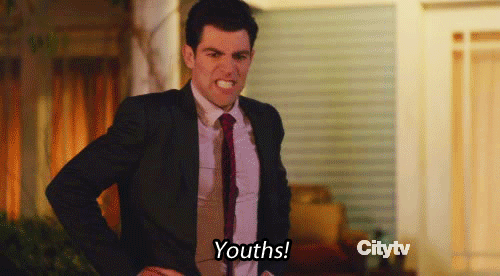

In [70]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display
from pathlib import Path
gifPath = Path("youths.gif")
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='gif')

In [26]:
#What's the relationship between gender and credit limit?
late_pmt_limit = df.groupby('Late_Pmt')['Limit'].mean()

print("Number of Late Paymets and Limit Mean, NT$")
late_pmt_limit

Number of Late Paymets and Limit Mean, NT$


Late_Pmt
0    187259.429030
1    158388.160868
2    122588.730911
3    105173.310225
4     87392.218717
5     93422.818792
6     94049.217002
Name: Limit, dtype: float64

Pay_0 is the most recent, meaning that means that during the last month (September) the due amount was paid and only the revolving credit was used. Pay_2 is a value for a period 2 months before Pay_0 (July). So, if Pay_0=0 & PAY_2==3, this means the bill was paid.

Text(12.943802083333338, 0.5, 'Count')

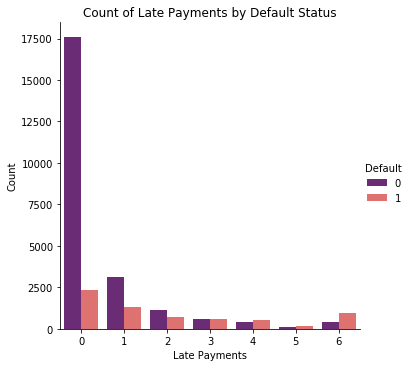

In [27]:
# 0 late pmts far outweigh multiple. 

sns.catplot(x='Late_Pmt', kind = 'count', hue = 'Default', palette='magma', data=df)

plt.title("Count of Late Payments by Default Status")
plt.xlabel('Late Payments')
plt.ylabel('Count')
# plt.legend(loc = 'center')

# Need: don't like where the legend is situated. Want it more centred.

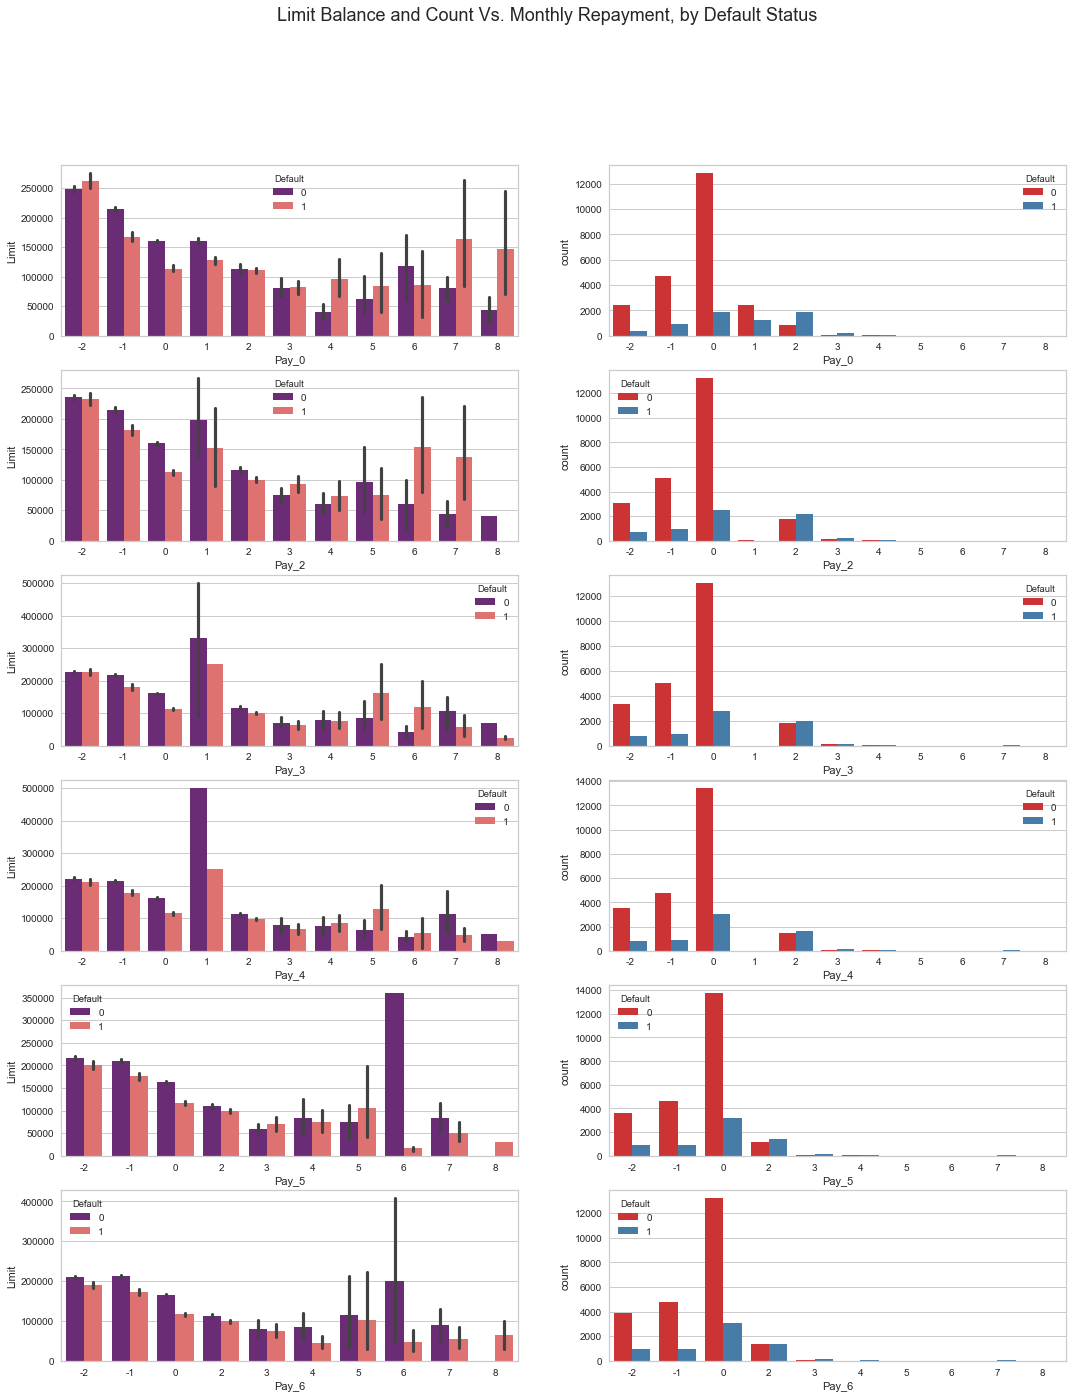

In [55]:
# Taking a look at the number of Defaults by the payment status each month. 

fig, axes= plt.subplots(6, 2, figsize = (18,22), facecolor='white') #figsize=(22,13),
fig.suptitle('Limit Balance and Count Vs. Monthly Repayment, by Default Status', size = 18)

#to give some examples of different palettes, here's this.
# deciding between magma and Set1 colour palette

ax1 = sns.barplot(x = 'Pay_0', y = 'Limit', hue='Default', palette='magma', data= df, ax=axes[0,0])
ax2 = sns.countplot(x='Pay_0', hue='Default', palette='Set1', data= df, ax=axes[0,1])

ax3 = sns.barplot(x='Pay_2', y = 'Limit', hue='Default', palette='magma', data= df, ax=axes[1,0])
ax4 = sns.countplot(x='Pay_2', hue='Default', palette='Set1', data= df, ax=axes[1,1])

ax5 = sns.barplot(x='Pay_3', y = 'Limit', hue='Default', palette='magma', data= df, ax=axes[2,0])
ax6 = sns.countplot(x='Pay_3', hue='Default', palette='Set1', data= df, ax=axes[2,1])

ax7 = sns.barplot(x='Pay_4', y = 'Limit', hue='Default', palette='magma', data= df, ax=axes[3,0])
ax8 = sns.countplot(x='Pay_4', hue='Default', palette='Set1', data= df, ax=axes[3,1])

ax9 = sns.barplot(x='Pay_5', y = 'Limit', hue='Default', palette='magma', data= df, ax=axes[4,0])
ax10 = sns.countplot(x='Pay_5', hue='Default', palette='Set1', data= df, ax=axes[4,1])

ax11 = sns.barplot(x='Pay_6', y = 'Limit', hue='Default', palette='magma', data= df, ax=axes[5,0])
ax12 = sns.countplot(x='Pay_6', hue='Default', palette='Set1', data= df, ax=axes[5,1])

# plt.tight_layout()

plt.show()

# Need: titles, maybe better sizing

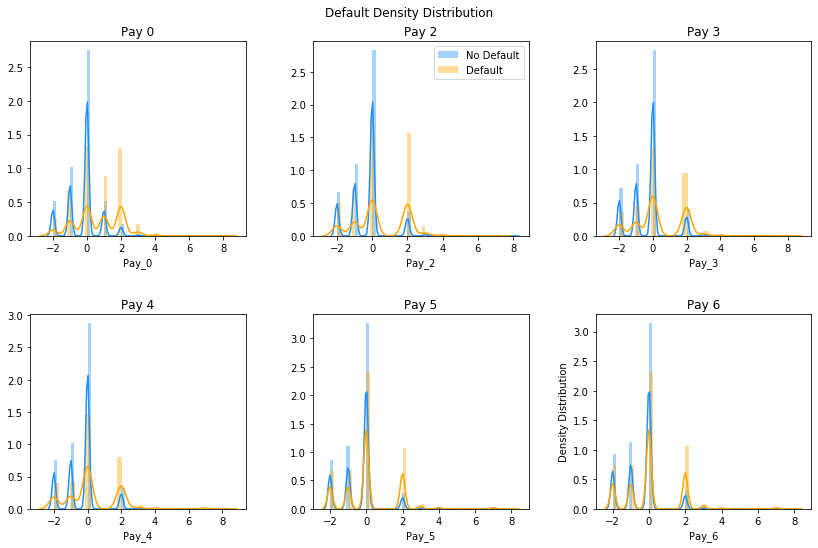

In [33]:
# Plot all the Distribution Densities
import seaborn as sns

f, axes= plt.subplots(2, 3, figsize = (12,8), facecolor='white') 
f.suptitle('Default Density Distribution')

ax1 = sns.distplot( df.loc[df.Default == 0, "Pay_0"] , 
                   color="dodgerblue", label="No Default", ax = axes[0,0])
ax1 = sns.distplot( df.loc[df.Default == 1, "Pay_0"] , 
                   color="orange", label="Default", ax = axes[0,0])

ax1.title.set_text('Pay 0')
plt.ylabel("Density Distribution")


ax2 = sns.distplot( df.loc[df.Default == 0, "Pay_2"] , 
                   color="dodgerblue", label="No Default", ax = axes[0,1])
ax2 = sns.distplot( df.loc[df.Default == 1, "Pay_2"] , 
                   color="orange", label="Default", ax = axes[0,1])

ax2.title.set_text('Pay 2')
plt.ylabel("Density Distribution")

ax3 = sns.distplot( df.loc[df.Default == 0, "Pay_3"] , 
                   color="dodgerblue", label="No Default", ax = axes[0,2])
ax3 = sns.distplot( df.loc[df.Default == 1, "Pay_3"] , 
                   color="orange", label="Default", ax = axes[0,2])


ax3.title.set_text('Pay 3')
plt.ylabel("Density Distribution")

ax4 = sns.distplot( df.loc[df.Default == 0, "Pay_4"] , 
                   color="dodgerblue", label="No Default", ax = axes[1,0])
ax4 = sns.distplot( df.loc[df.Default == 1, "Pay_4"] , 
                   color="orange", label="Default", ax = axes[1,0])

ax4.title.set_text('Pay 4')
# plt.ylabel("Density Distribution")

ax5 = sns.distplot( df.loc[df.Default == 0, "Pay_5"] , 
                   color="dodgerblue", label="No Default", ax = axes[1,1])
ax5 = sns.distplot( df.loc[df.Default == 1, "Pay_5"] , 
                   color="orange", label="No Default", ax = axes[1,1])

ax5.title.set_text('Pay 5')
plt.ylabel("Density Distribution")

ax6 = sns.distplot( df.loc[df.Default == 0, "Pay_6"] , 
                   color="dodgerblue", label="No Default", ax = axes[1,2])
ax6 = sns.distplot( df.loc[df.Default == 1, "Pay_6"] , 
                   color="orange", label="No Default", ax = axes[1,2])

ax6.title.set_text('Pay 6')


ax2.legend(['No Default', 'Default'],
           loc="best") 
plt.tight_layout(pad = 3.0)
plt.show()

# Need: titles on y-axis, Density Distribution
# necessary?

In [28]:
#Predictive model - check for correlation 

val = df.corr() #finds linear pearson correlation
val = val [val < 1] #to avoid correlating values with themselves (ie corr = 1)
val

,Limit,Gender,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_amt1,...,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Late_Pmt,Default
Limit,NaN,0.024755,-0.231088,-0.111012,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.236763,-0.153520
Gender,0.024755,NaN,0.013627,-0.028522,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.043760,-0.039961
Education,-0.231088,0.013627,NaN,-0.136797,0.182434,0.112593,0.129703,0.122425,0.116531,0.104088,0.088986,0.016597,...,0.006714,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.057453,0.033842
Marriage,-0.111012,-0.028522,-0.136797,NaN,-0.412001,0.018557,0.023620,0.032399,0.031831,0.034377,0.033168,-0.027832,...,-0.029082,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.007205,-0.027575
Age,0.144713,-0.090874,0.182434,-0.412001,NaN,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,-0.015356,0.013890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pay_amt4,0.203242,-0.002229,-0.040949,-0.013970,0.021379,-0.064005,-0.046858,-0.046067,-0.043461,-0.058299,0.019018,0.158303,...,0.143405,0.130191,0.293118,0.250237,0.199558,0.180107,0.216325,NaN,0.151830,0.157834,-0.072270,-0.056827
Pay_amt5,0.217202,-0.001667,-0.045138,-0.003019,0.022850,-0.058190,-0.037093,-0.035863,-0.033590,-0.033337,-0.046434,0.167026,...,0.179712,0.160433,0.141574,0.307729,0.148459,0.180908,0.159214,0.151830,NaN,0.154896,-0.075979,-0.055124
Pay_amt6,0.219595,-0.002766,-0.044061,-0.008383,0.019478,-0.058673,-0.036500,-0.035861,-0.026565,-0.023027,-0.025299,0.179341,...,0.182326,0.177637,0.164184,0.115494,0.185735,0.157634,0.162740,0.157834,0.154896,NaN,-0.065917,-0.053183
Late_Pmt,-0.236763,-0.043760,0.057453,-0.007205,-0.015356,0.635398,0.661151,0.653741,0.634303,0.606932,0.564630,-0.026905,...,0.001566,0.020798,0.037398,0.042391,-0.086045,-0.068192,-0.076115,-0.072270,-0.075979,-0.065917,NaN,0.398394


Text(0.5, 1, 'Credit Default Correlation Heatmap\n')

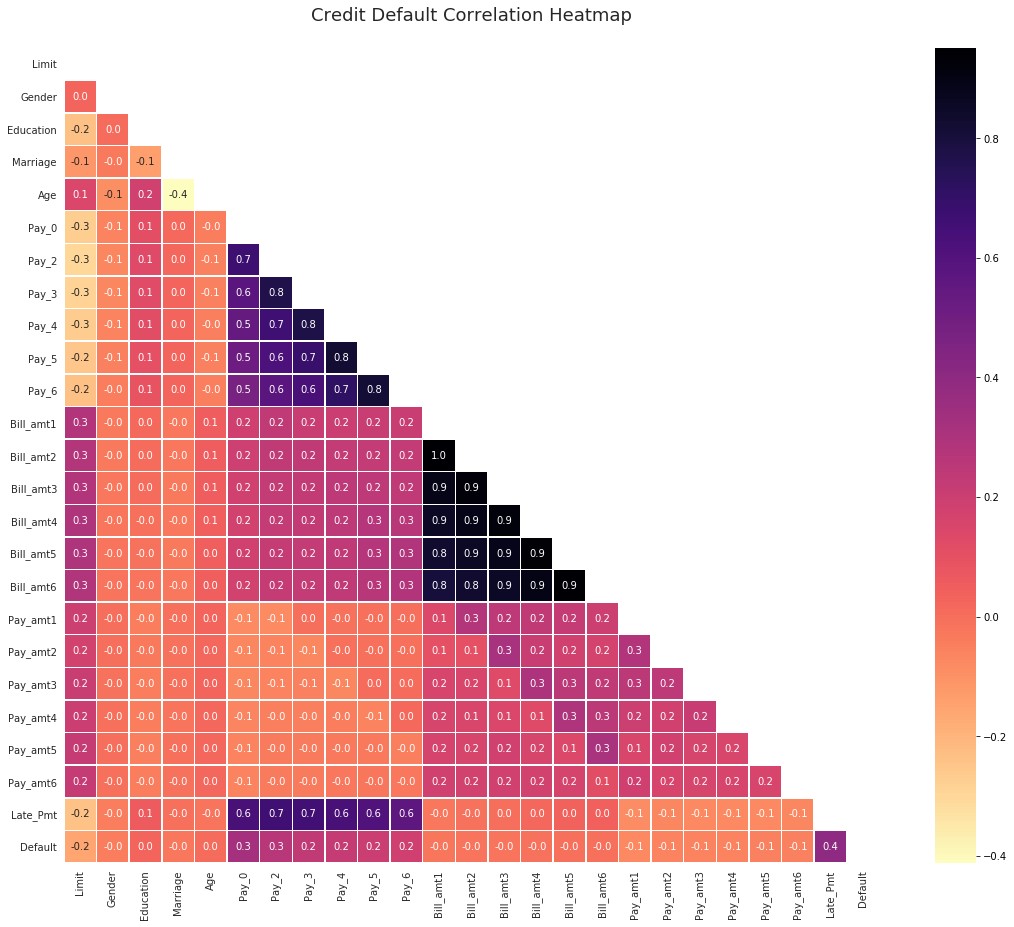

In [35]:
# Visualize

mask = np.full_like(val,0) #alternatively, can use np.zeros_like(result)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f,ax=plt.subplots(figsize=(20,15))
sns.heatmap(val, cbar=True, square=True, annot=True, fmt= '.1f',
           xticklabels=True, yticklabels=True,
           cmap='magma_r', linewidths=.5, mask=mask, ax=ax)
plt.title("Credit Default Correlation Heatmap\n", size = 18)

Text(0.5, 1, 'Correlation Heatmap')

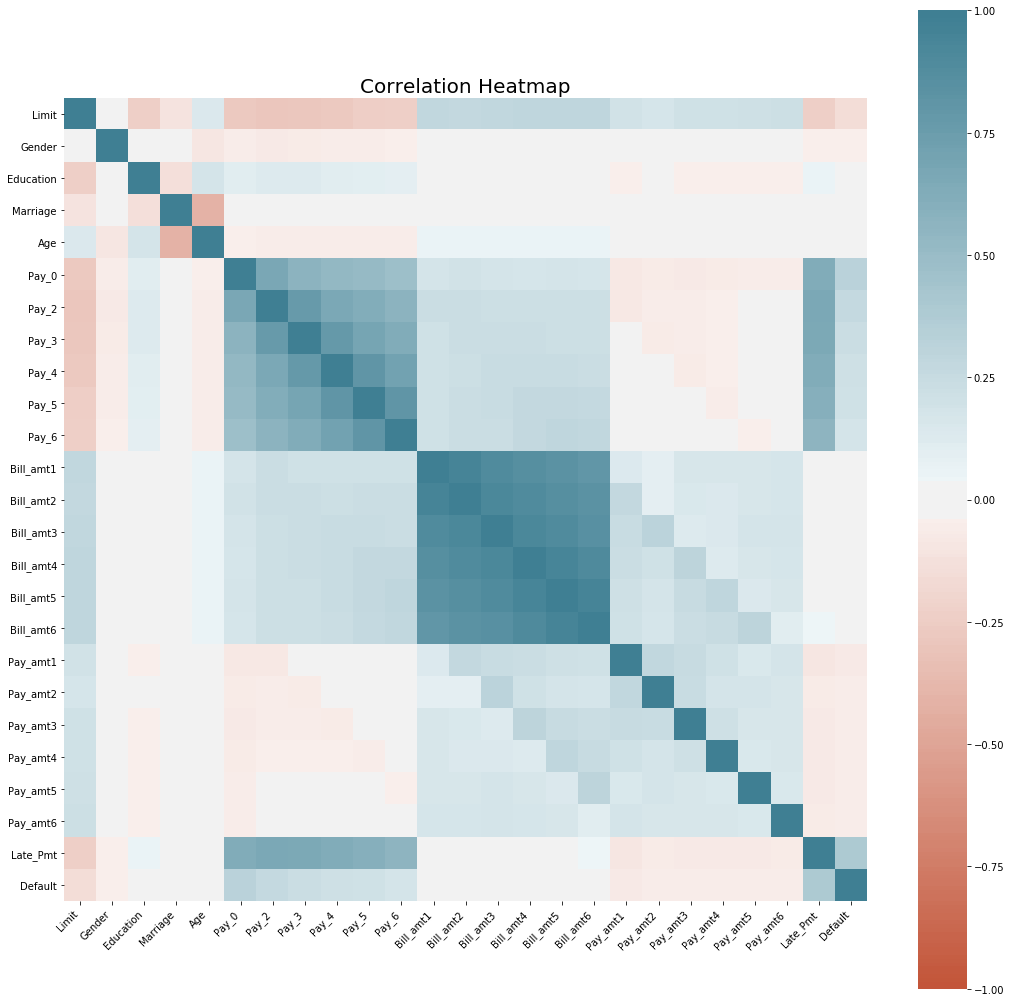

In [36]:
plt.figure(figsize=(18,18))
data = df
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title("Correlation Heatmap", size = 20)

<Figure size 432x288 with 0 Axes>

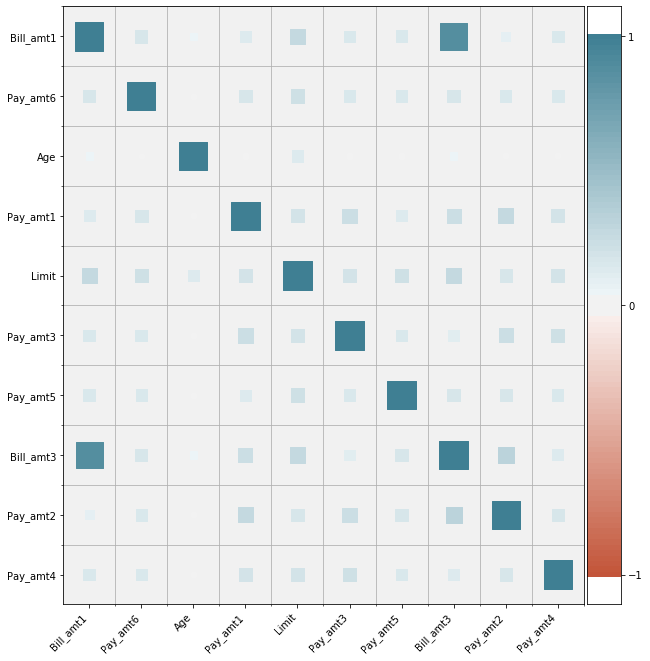

<Figure size 432x288 with 0 Axes>

In [37]:
# Make a correlation heatmap with Sizing

def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)
        
    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("YlGnBu", n_colors) 
        
    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation
    plt.title("Correlation Heatmap with Sizing")
    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]
    
    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)
    
    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)
        
    size_scale = kwargs.get('size_scale', 500)
    
    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}
    
    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}
    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot
        
    marker = kwargs.get('marker', 's')
    
    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}
    
    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')
    
    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = y[1] - y[0]
        ax.barh(
            y=y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(y), max(y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 
     
def corrplot(data, size_scale=20, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']

    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette= sns.diverging_palette(20, 220, n = 100),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale    
    )


# I'm going to select the top 10 features from my XGBoost Feature Selection
columns = ['Bill_amt1', 'Pay_amt6', 'Age', 'Pay_amt1', 'Limit', 
           'Pay_amt3', 'Pay_amt5', 'Bill_amt3', 'Pay_amt2', 'Pay_amt4'
] 

plt.figure(figsize=(10, 11))

corrplot(df[columns].corr().replace(np.nan, 0), size_scale=800)

plt.figure()

In [15]:
#isolate Independent Var, X (pay_0:pay_6) and Dependent Var, Y (Default) using pandas manipulation.
import sklearn
from sklearn.model_selection import train_test_split

X = df.drop('Default', axis=1)
y = df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=33, stratify = y)
# split this ish

# Feature Importance using XG Boost

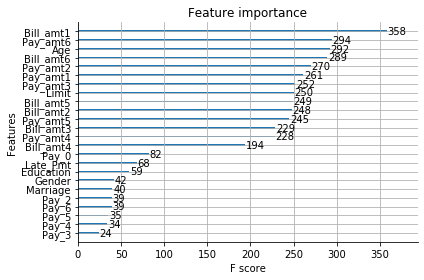

In [16]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
sns.despine()
fig_size = (15,15)
plt.tight_layout()
plt.show()
# interesting, Bill_Amt 1, then Pay_amt6 are most important. Late_Pmt is in the lower half.
# showing the default parameters for XG B

# PCA Analysis: Principal Components Analysis
PCA identifies the hyperplane that lies closest to the data, and then projects the data onto it.

In [40]:
from sklearn.decomposition import PCA

pca	= PCA(n_components = 4) 
X2D	= pca.fit_transform(X)

pca.explained_variance_ratio_
sum_of_pca_variance = (pca.explained_variance_ratio_.sum()) *100
print("The  reduced features account for the following % variability in Credit Card dataset:\n "
      , pca.explained_variance_ratio_)

print("\nTotal variability retained with PCA reduced to 4 features: {:.2f}%".format(sum_of_pca_variance))

The  reduced features account for the following % variability in Credit Card dataset:
  [0.61043701 0.29535381 0.03052419 0.01692859]

Total variability retained with PCA reduced to 4 features: 95.32%


In [42]:
import numpy as np

pca	= PCA() 
pca.fit(X) 
cumsum = np.cumsum(pca.explained_variance_ratio_) 
d = np.argmax(cumsum >= 0.95) + 1
print("Number of features required to retain 95% of the dataset's variability: ", d)
# compute PCA without reducing dimensionality, then computes minumum number of dimensions required
# to preserve 95% of the training set's variance
# 1 feature accounts for greater than or equal to 95% of the training dataset's variabiltiy

Number of features required to retain 95% of the dataset's variability:  4


Text(0.5, 1.0, '\nExplained Variance by # of Dimensions using PCA\n')

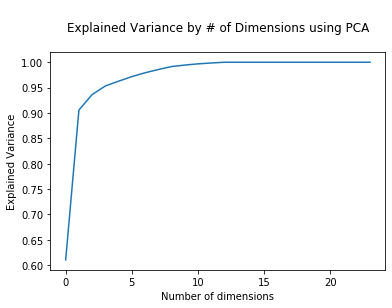

In [43]:
# Explained variance

# scale it

from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

plt.plot(cumsum)
plt.xlabel("Number of dimensions")
plt.ylabel("Explained Variance")
plt.title("\nExplained Variance by # of Dimensions using PCA\n")
# pretty much all of the variability is explained by the time 10 dimensions rolls around

In [44]:
from sklearn.decomposition import PCA # keep the first two principal components of the data 

pca = PCA(n_components=4) # fit PCA model to credit card
pca.fit(X_scaled)# transform data onto the first two principal components 

X_pca = pca.transform(X_scaled) 
print("Original shape of Credit Card dataset: {}".format(str(X_scaled.shape))) 
print("Reduced shape of Credit Card dataset: {}".format(str(X_pca.shape)))

# reduced training dataset down to 2 features

Original shape of Credit Card dataset: (30000, 24)
Reduced shape of Credit Card dataset: (30000, 4)


C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Second principal component')

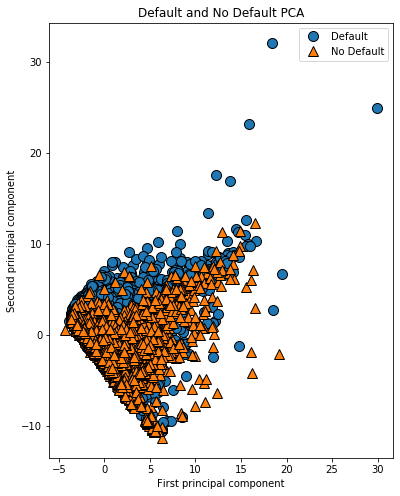

In [45]:
import numpy as np

import mglearn

# plot the first 2 principal components

# plot first vs. second principal component, colored by class 
plt.figure(figsize=(10, 8)) 
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y) 
plt.legend(["Default", "No Default"],
           loc="best") 
plt.gca().set_aspect("equal") 
plt.title("Default and No Default PCA")
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")

# Set up Pipeline for XG Boost

Best parameters (CV score = 80.42%)
Best parameters:
{'pca__n_components': 10, 'm__subsample': 1.0, 'm__silent': 0, 'm__reg_lambda': 10.0, 'm__min_child_weight': 5.0, 'm__max_depth': 15, 'm__gamma': 1.0, 'm__eta': 0.01, 'm__colsample_bytree': 0.9, 'm__colsample_bylevel': 0.4, 'm__booster': 'gbtree'}




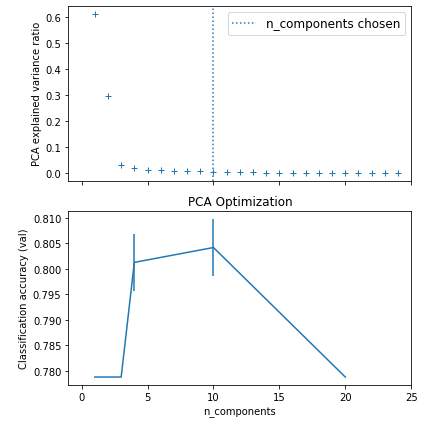

In [17]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model1 = XGBClassifier()

pipe_xg = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model1)]) # set up the pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify = y)
# setting the stratify parameter makes a split so that the proportion of values in the sample
# produced will be the same as the proportion of values provided, ie correct proportion of Default to No Default

# set parameters of pipelines using ‘__’ separated parameter names:

param_grid = {"pca__n_components":[1,2,3,4,5, 10, 15, 20, 25],
              'm__silent': [0],
              'm__max_depth': [6, 10, 15, 20],
              'm__eta': [0.001, 0.01, 0.1, 0.2, 0,3], #learning rate
              'm__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'm__colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'm__colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'm__min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
              'm__gamma': [0, 0.25, 0.5, 1.0],
              'm__reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], #L2 default is 1, akin to Ridge regression
              'm__booster':['gbtree']
              }

search = RandomizedSearchCV(pipe_xg, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_xg = search.fit(X_train, y_train)
#Get Best Parameters
best_param_score = search.best_score_ *100
print("Best parameters (CV score = {:.2f}%)".format(best_param_score))
print("Best parameters:")
print(search.best_params_)
print('\n')

# Plot the PCA spectrum
pca.fit(X_train)

#plot

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
plt.title("PCA Optimization")
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('\nClassification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 25)

plt.tight_layout()
plt.show()

# 10 features seems my best bet

In [18]:
# cross-validation and error measuring
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'eta': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, as_pandas=True, seed=123)

In [19]:
cv_results.head()

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.198050,0.000838,0.203933,0.001342
1,0.192900,0.001955,0.194833,0.002027
2,0.191567,0.002544,0.192600,0.000616
3,0.188067,0.003229,0.189267,0.003137
4,0.187217,0.001725,0.188400,0.000648


In [20]:
# cross-validation mean
print("Cross-Validation Results for error mean on test data:")
print((cv_results["test-error-mean"]).tail(1))

Cross-Validation Results for error mean on test data:
14    0.1875
Name: test-error-mean, dtype: float64


In [21]:
# AUC results with Cross-Validation

cv_results_auc = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, metrics = 'auc', as_pandas=True, seed=123)

cv_results_auc.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.703494,0.003106,0.693671,0.002334
1,0.760305,0.003101,0.754170,0.005489
2,0.768220,0.001724,0.760996,0.007771
3,0.770889,0.002902,0.764009,0.005561
4,0.772542,0.002471,0.765553,0.006664


In [22]:
#----------Testing Best Parameters---------

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time

t0 = time()
clf_xg =clf_xg.best_estimator_
y_pred_xg = clf_xg.predict(X_test)
print("[----------] Done in %0.3fs" % (time() - t0))

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores_cv_xg = cross_val_score(clf_xg, X_train, y_train, cv=cv)

scores = cross_val_score(clf_xg, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

[----------] Done in 0.059s


------------------------- | XGBoost Performance Summary | ---------------------------
Accuracy: 80.65%
CV Mean: 0.804 (std: 0.00)


XG Boost Confusion Matrix:

[[4480  193]
 [ 968  359]]

XG Boost Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      4673
           1       0.65      0.27      0.38      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.61      0.63      6000
weighted avg       0.78      0.81      0.77      6000

Mean ROC AUC: 73.92%
Misclassified examples: 1161
Count of prediction dataset:  6000
Misclassification Rate: 19.35%
Training Set Accuracy: 82.917%
Test Set Accuracy: 80.65%

------------------ XGBoostClassifier -- Parameters specified -- : classifier.fit [Done]



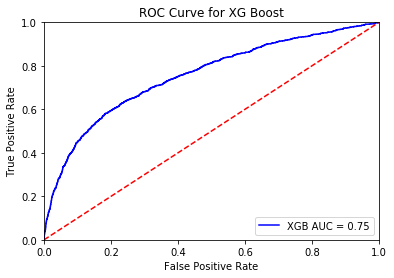

In [23]:
#---------XGBoost Classification report--------

print ("------------------------- | XGBoost Performance Summary | ---------------------------")
xgb_accuracy = (accuracy_score(y_pred_xg, y_test)) *100
print("Accuracy: {:.2f}%".format(xgb_accuracy))
print("CV Mean: {:.3f} (std: {:.2f})".format(scores_cv_xg.mean(),
                                          scores_cv_xg.std()),
                                          end="\n\n" )
xgb_cm = confusion_matrix(y_test, y_pred_xg)
xg_misclass = (y_test != y_pred_xg).sum()
xg_error_rate = ((y_test != y_pred_xg).sum()/len(y_pred_xg))*100
mean_roc_auc = (scores.mean())*100
xg_train_accuracy = (clf_xg.score(X_train, y_train))*100
xg_test_accuracy = (clf_xg.score(X_test, y_test))*100

print("\nXG Boost Confusion Matrix:\n")
print(xgb_cm)
print("\nXG Boost Classification Report:\n")
print(classification_report(y_test, y_pred_xg))
print('Mean ROC AUC: {:.2f}%'.format(mean_roc_auc))
print('Misclassified examples: {:d}'.format(xg_misclass))
print('Count of prediction dataset: ', len(y_pred_xg))
print('Misclassification Rate: {:.2f}%'.format(xg_error_rate))
print("Training Set Accuracy: {:.3f}%".format(xg_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(xg_test_accuracy))
print('\n------------------ XGBoostClassifier -- Parameters specified -- : classifier.fit [Done]\n')

# ROC the houseeeeeeeeeeeeeeeeee
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_xg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve for XG Boost')
plt.plot(fpr, tpr, 'b', label = 'XGB AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

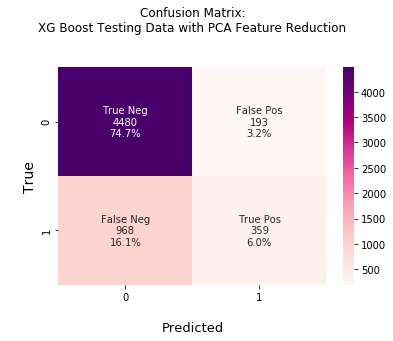

In [24]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               xgb_cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    xgb_cm.flatten()/np.sum(xgb_cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(xgb_cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\nXG Boost Testing Data with PCA Feature Reduction\n\n")
plt.show()

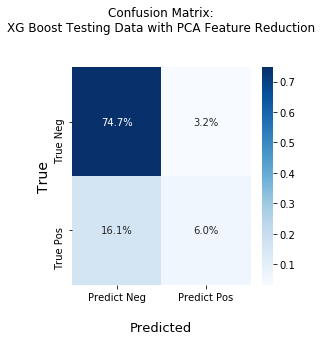

In [25]:
#Confuse dat matrix for XG Boost. I want to see it as percentages, not as absolute numbers.

import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,4))
sns.heatmap(xgb_cm/np.sum(xgb_cm), annot=True, 
            fmt='.1%', cmap='Blues', cbar = True, 
            xticklabels = ['Predict Neg', 'Predict Pos'], 
            yticklabels = ['True Neg', 'True Pos']) #  annot=True, cmap="Blues", fmt="d",       

plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\nXG Boost Testing Data with PCA Feature Reduction\n\n")
plt.show()


Prediction accuracy for PCA-reduced standardized test dataset -- XG Boost
81.03%


PC 1 with:
 [ 0.04710959 -0.0216401   0.02261125 -0.00454849  0.00960621  0.1849049
  0.21833703  0.22535748  0.2318957   0.23412895  0.22798387  0.31728182
  0.32845131  0.33159442  0.3364847   0.33509327  0.32895436  0.08266467
  0.06841094  0.07559389  0.06920812  0.069035    0.06138456  0.14386716]

PC 2 with:
 [ 0.28918145  0.02567186 -0.08426466 -0.03471635  0.05603881 -0.26747739
 -0.29499786 -0.30180103 -0.2987331  -0.28583681 -0.2620959   0.17807234
  0.17943086  0.18360051  0.18238286  0.17994371  0.17584292  0.14804483
  0.13290475  0.14296664  0.13254342  0.13375903  0.12132777 -0.33256637]


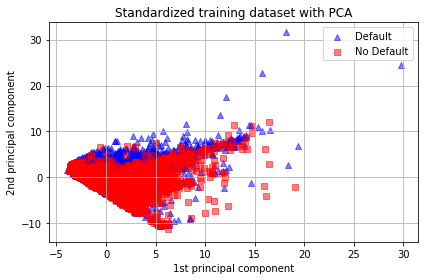

In [26]:
# Putting it all together

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt

fig_size = (8, 6)
# Fit to data and predict using pipelined scaling, GNB and PCA.
pipe_xg.fit(X_train, y_train)
pred_test_std = pipe_xg.predict(X_test)
xg_std_pca = metrics.accuracy_score(y_test, pred_test_std)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for PCA-reduced standardized test dataset -- XG Boost')
print('{:.2%}\n'.format(xg_std_pca))

# Extract PCA from pipeline
pca_std = pipe_xg.named_steps['pca']

# Show first principal components
print('\nPC 1 with:\n', pca_std.components_[0])
print('\nPC 2 with:\n', pca_std.components_[1])
# Use PCA without and with scale on X_train data for visualization.
scaler = pipe_xg.named_steps['s']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, ax = plt.subplots()

for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
#                 label='Benign', #'class %s' % l,
                alpha=0.5,
                marker=m
                )

ax.set_title('Standardized training dataset with PCA')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(["Default", "No Default"],
           loc="best")
ax.grid()

plt.tight_layout()

plt.show()

# Logistic Regression : an oldie but goodie.
Logistic regression is not able to handle a large number of categorical features/variables, and is vulnerable to overfitting. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

In [188]:
model2.get_params().keys() # what are my params to work with all up in heah

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

Logistic Regression Best parameters (CV score = 80.25%)
{'pca__n_components': 10, 'm__solver': 'liblinear', 'm__random_state': 100, 'm__penalty': 'l1', 'm__max_iter': 100, 'm__class_weight': None, 'm__C': 100}


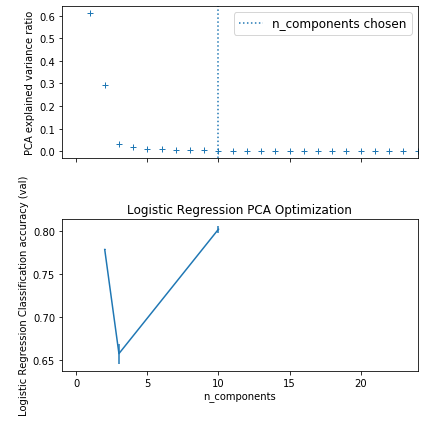

In [30]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model2 = LogisticRegression()

pipe_log = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model2)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify = y)

# set parameters of pipelines using ‘__’ separated parameter names:
from sklearn.utils.fixes import loguniform

param_grid = {"pca__n_components":[1,2,3,4,5, 10, 15, 20],
              'm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'm__penalty' : ['l1', 'l2', 'elasticnet'],
              'm__class_weight' : ['balanced', None],
              'm__random_state': [0, 50, 100],
              'm__max_iter': [0,100,1000, 10000],
              'm__solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}          

search = RandomizedSearchCV(pipe_log, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_log = search.fit(X_train, y_train)
#Get Best Parameters
best_param_score = search.best_score_ * 100
print("Logistic Regression Best parameters (CV score = {:.2f}%)".format(best_param_score))
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

#plot

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
plt.title("Logistic Regression PCA Optimization")
ax0.plot(np.arange(1, pca.n_components_ + 1),pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('\nLogistic Regression Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 24)

plt.tight_layout()
plt.show()

# n_components = 10, similar accuracy to XGB 

In [31]:
# Testing the best parameters
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time

t0 = time()
clf_log = clf_log.best_estimator_
y_pred_log = clf_log.predict(X_test)
print("[------] Done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores_cv_log = cross_val_score(clf_log, X_train, y_train, cv=cv)

scores_log = cross_val_score(clf_log, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

[------] Done in 0.013s


-------------- | Logistic Regresssion Performance Summary |--------------

Logistic Regression Accuracy: 80.42%
CV Mean: 80.23% (STD: 0.48%)


Logistic Regression Confusion Matrix:

[[4552  121]
 [1054  273]]

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4673
           1       0.69      0.21      0.32      1327

    accuracy                           0.80      6000
   macro avg       0.75      0.59      0.60      6000
weighted avg       0.79      0.80      0.76      6000

Mean ROC AUC: 72.98%
Misclassified examples: 1175
Misclassification Rate: 19.58%
Training Set Accuracy: 80.22%
Test Set Accuracy: 80.42%
--------------- Logistic Regression -- Parameters specified-- : classifier.fit [Done]


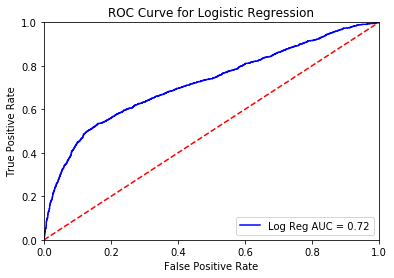

In [32]:
#--------| Logistic Regression Classification report | --------

print ("-------------- | Logistic Regresssion Performance Summary |--------------\n")
log_accuracy = (accuracy_score(y_pred_log, y_test)) *100

print("Logistic Regression Accuracy: {:.2f}%".format(log_accuracy)) 
print("CV Mean: {:.2f}% (STD: {:.2f}%)".format(scores_cv_log.mean()*100,
                                          scores_cv_log.std()*100),
                                          end="\n\n" )
log_cm = confusion_matrix(y_test, y_pred_log)
log_misclass = (y_test != y_pred_log).sum()
log_error_rate = ((y_test != y_pred_log).sum()/len(y_pred_log))*100
log_mean_roc_auc = (scores_log.mean())*100
log_train_accuracy = (clf_log.score(X_train, y_train))*100
log_test_accuracy = (clf_log.score(X_test, y_test))*100

print("\nLogistic Regression Confusion Matrix:\n")
print(log_cm)
print("\nLogistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_log))
print('Mean ROC AUC: {:.2f}%'.format(log_mean_roc_auc))
print('Misclassified examples: {:d}'.format(log_misclass))
print('Misclassification Rate: {:.2f}%'.format(log_error_rate))
print("Training Set Accuracy: {:.2f}%".format(log_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(log_test_accuracy))
print('--------------- Logistic Regression -- Parameters specified-- : classifier.fit [Done]')


# ROC the houseeeeeeeeeeeeeeeeee
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_log.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'Log Reg AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# unbalanced dataset yiels a lopsided false negative rate!

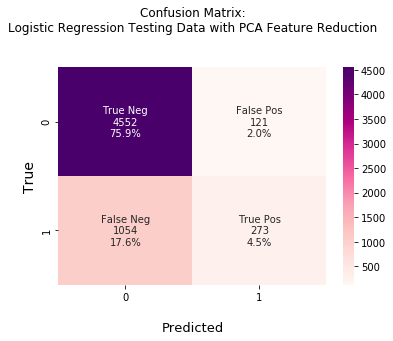

In [33]:
#Pretty Confusion Matrix for Logistic Regression Testing Data

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               log_cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    log_cm.flatten()/np.sum(log_cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(log_cm, annot=labels, fmt='', cmap='RdPu')

plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\nLogistic Regression Testing Data with PCA Feature Reduction\n\n")
plt.show()


Prediction accuracy for PCA-reduced standardized test dataset -- Logistic Regression
80.93%


PC 1 with:
 [ 0.04710959 -0.0216401   0.02261125 -0.00454849  0.00960621  0.1849049
  0.21833703  0.22535748  0.2318957   0.23412895  0.22798387  0.31728182
  0.32845131  0.33159442  0.3364847   0.33509327  0.32895436  0.08266467
  0.06841094  0.07559389  0.06920812  0.069035    0.06138456  0.14386716]

PC 2 with:
 [ 0.28918145  0.02567186 -0.08426466 -0.03471635  0.05603881 -0.26747739
 -0.29499786 -0.30180103 -0.2987331  -0.28583681 -0.2620959   0.17807234
  0.17943086  0.18360051  0.18238286  0.17994371  0.17584292  0.14804483
  0.13290475  0.14296664  0.13254342  0.13375903  0.12132777 -0.33256637]


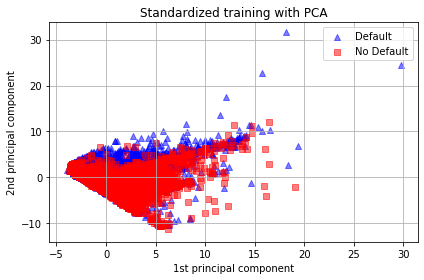

In [34]:
# Putting it all together

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt

fig_size = (8, 6)
# Fit to data and predict using pipelined scaling, GNB and PCA.
pipe_log.fit(X_train, y_train)
pred_test_std = pipe_log.predict(X_test)
log_std_pca = metrics.accuracy_score(y_test, pred_test_std)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for PCA-reduced standardized test dataset -- Logistic Regression')
print('{:.2%}\n'.format(log_std_pca))

# Extract PCA from pipeline
pca_std = pipe_log.named_steps['pca']

# Show first principal components
print('\nPC 1 with:\n', pca_std.components_[0])
print('\nPC 2 with:\n', pca_std.components_[1])
# Use PCA without and with scale on X_train data for visualization.
scaler = pipe_log.named_steps['s']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, ax = plt.subplots()

for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                alpha=0.5,
                marker=m
                )

ax.set_title('Standardized training with PCA')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(["Default", "No Default"],
           loc="best")
ax.grid()

plt.tight_layout()

plt.show()

# Decision Tree: A Basic Bitch

In [77]:
model3.get_params().keys() # what are my params to work with all up in heah

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

Decision Tree Best parameters (CV score = 80.33%)
{'m__ccp_alpha': 0, 'm__class_weight': None, 'm__criterion': 'entropy', 'm__max_depth': 10, 'pca__n_components': 15}


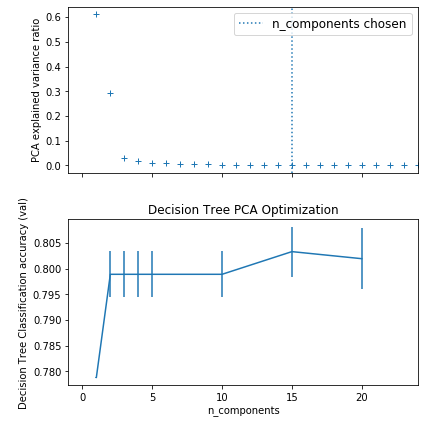

In [35]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from random import randint

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model3 = DecisionTreeClassifier()

pipe_tree = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model3)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify = y)

# set parameters of pipelines using ‘__’ separated parameter names:
from sklearn.utils.fixes import loguniform

param_grid = {"pca__n_components": [1,2,3,4,5, 10, 15, 20],
              'm__ccp_alpha' : [0, 0.1, 0.2, 0.3, 1],
              "m__max_depth": [2, 10], # I set a limit of 10 for max depth, otherwise all models would select None 
#               "m__max_features": [1, 9],
#               "m__min_samples_split":[2,10],
#               "m__min_samples_leaf": [1, 9], 
              "m__criterion": ["gini", "entropy"],
              "m__class_weight" : ['balanced', None]} 

search = GridSearchCV(pipe_tree, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_tree = search.fit(X_train, y_train)
#Get Best Parameters
best_param_score = search.best_score_ * 100
print("Decision Tree Best parameters (CV score = {:.2f}%)".format(best_param_score))
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

#plot

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
plt.title("Decision Tree PCA Optimization")
ax0.plot(np.arange(1, pca.n_components_ + 1),pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('\nDecision Tree Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 24)

plt.tight_layout()
plt.show()

In [36]:
#----------Testing Best Parameters---------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time

t0 = time()
clf_tree = clf_tree.best_estimator_
y_pred_tree = clf_tree.predict(X_test)
print("done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores_cv_tree = cross_val_score(clf_tree, X_train, y_train, cv=cv)

scores_tree = cross_val_score(clf_tree, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

done in 0.012s


-------------- | Decision Tree Performance Summary |--------------

Decision Tree Accuracy: 80.47%
CV Mean: 80.11% (STD: 0.65%)


Decision Tree Confusion Matrix:

[[4374  299]
 [ 873  454]]

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4673
           1       0.60      0.34      0.44      1327

    accuracy                           0.80      6000
   macro avg       0.72      0.64      0.66      6000
weighted avg       0.78      0.80      0.78      6000

Mean ROC AUC: 65.04%
Misclassified examples: 1172
Misclassification Rate: 0.20%
Training Set Accuracy: 84.73%
Test Set Accuracy: 80.47%
--------------- Decision Tree Classifier -- Parameters specified-- : classifier.fit [Done]


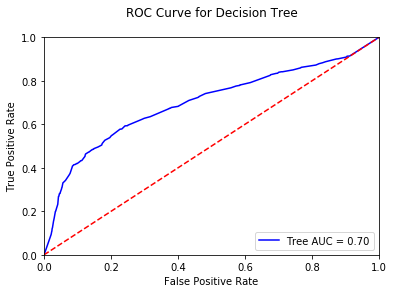

In [37]:
#--------| Decision Tree Classification report | --------

print ("-------------- | Decision Tree Performance Summary |--------------\n")
tree_accuracy = (accuracy_score(y_pred_tree, y_test)) *100

print("Decision Tree Accuracy: {:.2f}%".format(tree_accuracy)) 
print("CV Mean: {:.2f}% (STD: {:.2f}%)".format(scores_cv_tree.mean()*100,
                                          scores_cv_tree.std()*100),
                                          end="\n\n" )
tree_cm = confusion_matrix(y_test, y_pred_tree)
tree_misclass = (y_test != y_pred_tree).sum()
tree_error_rate = (y_test != y_pred_tree).sum()/len(y_pred_tree)
tree_mean_roc_auc = (scores_tree.mean())*100
tree_train_accuracy = (clf_tree.score(X_train, y_train))*100
tree_test_accuracy = (clf_tree.score(X_test, y_test))*100

print("\nDecision Tree Confusion Matrix:\n")
print(tree_cm)
print("\nDecision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_tree))
print('Mean ROC AUC: {:.2f}%'.format(tree_mean_roc_auc))
print('Misclassified examples: {:d}'.format(tree_misclass))
print('Misclassification Rate: {:.2f}%'.format(tree_error_rate))
print("Training Set Accuracy: {:.2f}%".format(tree_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(tree_test_accuracy))
print('--------------- Decision Tree Classifier -- Parameters specified-- : classifier.fit [Done]')

# ROC the houseeeeeeeeeeeeeeeeee
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_tree.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve for Decision Tree\n')
plt.plot(fpr, tpr, 'b', label = 'Tree AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

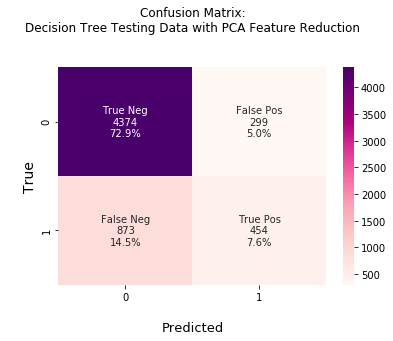

In [38]:
#Pretty Confusion Matrix for Decision Tree Testing Data

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               tree_cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    tree_cm.flatten()/np.sum(tree_cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(tree_cm, annot=labels, fmt='', cmap='RdPu')

plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\nDecision Tree Testing Data with PCA Feature Reduction\n\n")
plt.show()


Prediction accuracy for PCA-reduced standardized test dataset -- Decision Tree
72.23%


PC 1 with:
 [ 0.04710959 -0.0216401   0.02261125 -0.00454849  0.00960621  0.1849049
  0.21833703  0.22535748  0.2318957   0.23412895  0.22798387  0.31728182
  0.32845131  0.33159442  0.3364847   0.33509327  0.32895436  0.08266467
  0.06841094  0.07559389  0.06920812  0.069035    0.06138456  0.14386716]

PC 2 with:
 [ 0.28918145  0.02567186 -0.08426466 -0.03471635  0.05603881 -0.26747739
 -0.29499786 -0.30180103 -0.2987331  -0.28583681 -0.2620959   0.17807234
  0.17943086  0.18360051  0.18238286  0.17994371  0.17584292  0.14804483
  0.13290475  0.14296664  0.13254342  0.13375903  0.12132777 -0.33256637]


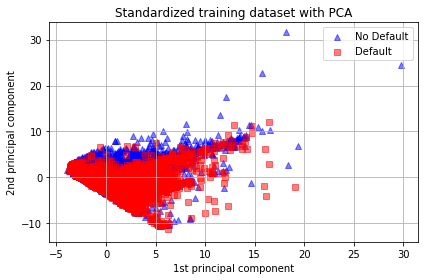

In [39]:
# Visualize the PCA reduction and standardization

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt

fig_size = (8, 6)
# Fit to data and predict using pipelined scaling, GNB and PCA.
pipe_tree.fit(X_train, y_train)
pred_test_std = pipe_tree.predict(X_test)
tree_std_pca = metrics.accuracy_score(y_test, pred_test_std)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for PCA-reduced standardized test dataset -- Decision Tree')
print('{:.2%}\n'.format(tree_std_pca))

# Extract PCA from pipeline
pca_std = pipe_tree.named_steps['pca']

# Show first principal components
print('\nPC 1 with:\n', pca_std.components_[0])
print('\nPC 2 with:\n', pca_std.components_[1])
# Use PCA without and with scale on X_train data for visualization.
scaler = pipe_tree.named_steps['s']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, ax = plt.subplots()

for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                alpha=0.5,
                marker=m
                )

ax.set_title('Standardized training dataset with PCA')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(["No Default", "Default"],
           loc="best")
ax.grid()

plt.tight_layout()

plt.show()

In [84]:
# Tree visualization
from sklearn import tree
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from IPython.display import Image
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier
tree_model = tree.DecisionTreeClassifier(ccp_alpha = 0, class_weight = 'balanced',
                                         criterion= 'entropy', max_depth = 5,  
                                         max_features = 6, max_leaf_nodes = 6
                                        )

tree_model.fit(X_train_std_transformed, y_train)

dot_data = export_graphviz(tree_model,
                          filled=True,
                          rounded=True,
                          class_names=['Default',
                                      'No Default'],
                          feature_names = ['Limit',  'Gender', 'Education', 'Marriage',
 'Age', 'Pay_0', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2',
 'Bill_amt3',
 'Bill_amt4',
 'Bill_amt5',
 'Bill_amt6',
 'Pay_amt1',
 'Pay_amt2',
 'Pay_amt3',
 'Pay_amt4',
 'Pay_amt5',
 'Pay_amt6',
 'Late_Pmt'],                           out_file=None)
# graph.title("Diagnosis Decision tree")
graph= graph_from_dot_data(dot_data)
graph
graph.write_png('credit_card_tree.png') #see home page for credit_card_tree, but I've pasted below for ease of viewing.
print('Credit Card Decision Tree')

Credit Card Decision Tree



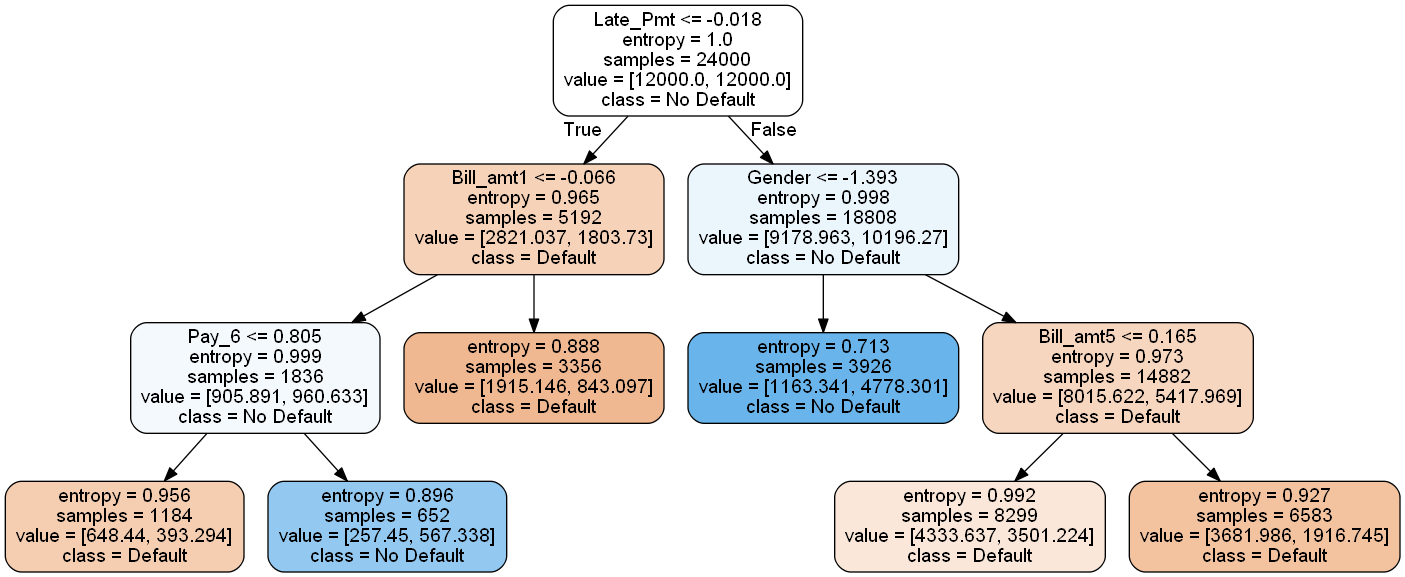

## Learning Curves

--------------- | XBBoost Classifier | -- Learning Curve -- : [Done]


C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


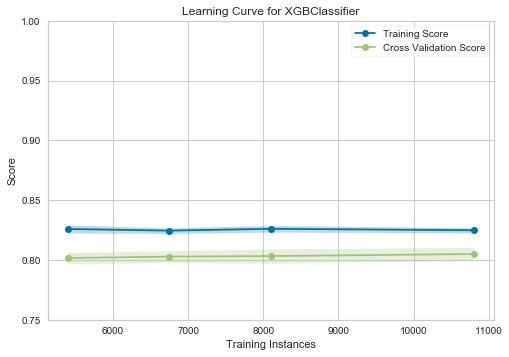

In [41]:
## Learning Curve : XG Boost ##
print('--------------- | XBBoost Classifier | -- Learning Curve -- : [Done]')
import sklearn.metrics
from yellowbrick.model_selection import LearningCurve
sizes = [0.2, 0.25, 0.3, 0.4]
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_xg, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4 # I want f1_weighted becasue f1
    # is the weighted avg of precision and recall. 
)

visualizer.fit(X, y)        # Fit the data to the visualizer
plt.ylim(0.75, 1.0)
visualizer.show()           # Show this mother

--------------- | Logistic Regression | -- Learning Curve -- : [Done]


C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


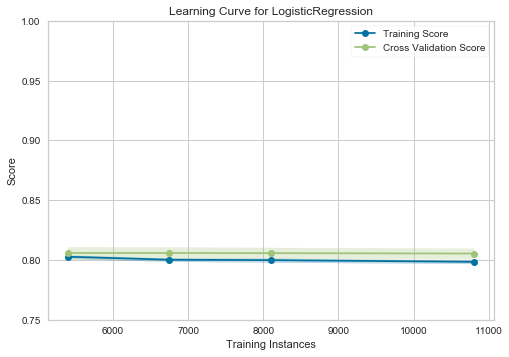

In [42]:
## Learning Curve : Logistic Regression ##
print('--------------- | Logistic Regression | -- Learning Curve -- : [Done]')
import sklearn.metrics
from yellowbrick.model_selection import LearningCurve
sizes = [0.2, 0.25, 0.3, 0.4]
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_log, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4 # I want f1_weighted becasue f1
    # is the weighted avg of precision and recall. 
)

visualizer.fit(X, y)        # Fit the data to the visualizer
plt.ylim(0.75, 1.0)
visualizer.show()           # Show this mother
# converges at training size = 600

--------------- | Decision Tree Classifier | -- Learning Curve -- : [Done]


C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


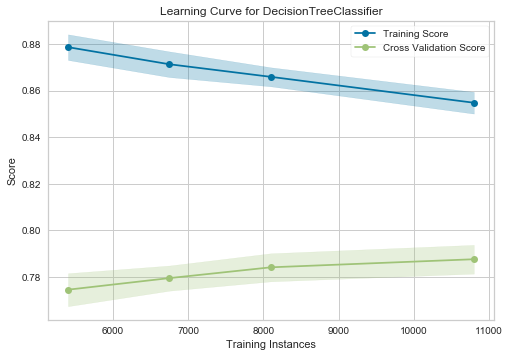

In [43]:
## Learning Curve : Decision Tree
print('--------------- | Decision Tree Classifier | -- Learning Curve -- : [Done]')
import sklearn.metrics
from yellowbrick.model_selection import LearningCurve
sizes = [0.2, 0.25, 0.3, 0.4] # checking out different sizes for training. 
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_tree, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4 # I want f1_weighted becasue f1
    # is the weighted avg of precision and recall. 
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure